# Activity 3 - MNIST Autoencoder (Instructor Version)

In this activity you will create an autoencoder network for the MNIST dataset.

Import pickle, numpy, matplotlib and the Model, Input and Dense classes from keras.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.


Load the images from the supplied sample of the MNIST dataset

In [2]:
with open('mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

Prepare the images for input into a neural network.  As a hint there are **two** separate steps in this process.

In [3]:
images = images.reshape((-1, 28 ** 2))
images = images / 255.

Construct a simple autoencoder network that reduces the image size to 10 x 10 after the encoding stage.

In [5]:
input_stage = Input(shape=(784,))
encoding_stage = Dense(100, activation='relu')(input_stage)
decoding_stage = Dense(784, activation='sigmoid')(encoding_stage)
autoencoder = Model(input_stage, decoding_stage)

Instructions for updating:
Colocations handled automatically by placer.


Compile the autoencoder using a binary cross entropy loss function and adadelta gradient descent.

In [6]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

Fit the encoder model

In [7]:
autoencoder.fit(images, images, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10000/10000 [==============================] - 2s 158us/step - loss: 0.3191
Epoch 2/100
10000/10000 [==============================] - 1s 132us/step - loss: 0.2352
Epoch 3/100
10000/10000 [==============================] - 1s 130us/step - loss: 0.2054
Epoch 4/100
10000/10000 [==============================] - 1s 132us/step - loss: 0.1867
Epoch 5/100
10000/10000 [==============================] - 1s 144us/step - loss: 0.1739
Epoch 6/100
10000/10000 [==============================] - 1s 131us/step - loss: 0.1641
Epoch 7/100
10000/10000 [==============================] - 2s 157us/step - loss: 0.1561
Epoch 8/100
10000/10000 [==============================] - 1s 147us/step - loss: 0.1492
Epoch 9/100
10000/10000 [==============================] - 1s 137us/step - loss: 0.1432
Epoch 10/100
10000/10000 [==============================] - 1s 117us/step - loss: 0.1379
Epoch 11/100
10000/10000 [==============================] - 1s 123us/st

10000/10000 [==============================] - 1s 127us/step - loss: 0.0761
Epoch 91/100
10000/10000 [==============================] - 1s 132us/step - loss: 0.0760
Epoch 92/100
10000/10000 [==============================] - 1s 129us/step - loss: 0.0759
Epoch 93/100
10000/10000 [==============================] - 1s 127us/step - loss: 0.0758
Epoch 94/100
10000/10000 [==============================] - 1s 130us/step - loss: 0.0757
Epoch 95/100
10000/10000 [==============================] - 1s 128us/step - loss: 0.0756
Epoch 96/100
10000/10000 [==============================] - 1s 130us/step - loss: 0.0755
Epoch 97/100
10000/10000 [==============================] - 1s 127us/step - loss: 0.0754
Epoch 98/100
10000/10000 [==============================] - 1s 126us/step - loss: 0.0754
Epoch 99/100
10000/10000 [==============================] - 1s 125us/step - loss: 0.0753
Epoch 100/100
10000/10000 [==============================] - 1s 128us/step - loss: 0.0752


Calculate and store the output of the encoding stage for the first 5 samples.

In [10]:
encoder_output = Model(input_stage, encoding_stage).predict(images[:5])

Reshape the encoder output to 10 x 10 (10 x 10 = 100) pixels and multiply by 255

In [11]:
encoder_output = encoder_output.reshape((-1, 10, 10)) * 255

Calculate and store the output of the decoding stage for the first 5 samples

In [12]:
decoder_output = autoencoder.predict(images[:5])

Reshape the output of the decoder to 28 x 28 and multiply by 255

In [15]:
decoder_output = decoder_output.reshape((-1, 28, 28)) * 255

Plot the original image, the encoder output and the decoder.

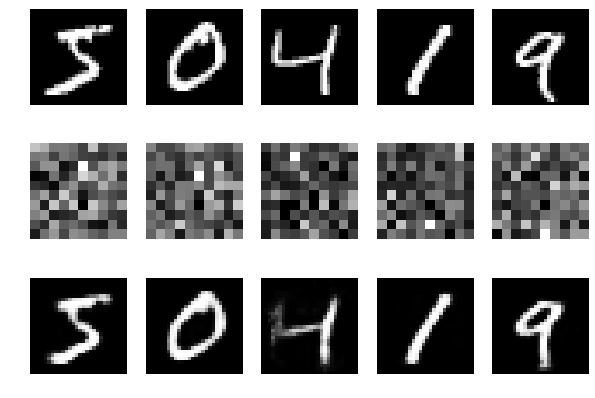

In [17]:
images = images.reshape((-1, 28, 28))
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        